# Word cloud generation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-dataset/Email spam.csv


In [2]:
import matplotlib.pyplot as plt
import regex as re
import sqlite3
from wordcloud import WordCloud

In [3]:
df=pd.read_csv("../input/email-spam-dataset/Email spam.csv")

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.shape

(5728, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
print('Spam count',len(df.loc[df['spam']==1]))
print('Not spam count',len(df.loc[df['spam']==0]))

Spam count 1368
Not spam count 4360


In [8]:
print(df.shape)

df=df.drop_duplicates()

print(df.shape)

(5728, 2)
(5695, 2)


In [9]:
df = df.reset_index(inplace = False)[['text','spam']]

In [10]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [11]:
df['spam'].unique()

array([1, 0])

In [12]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df = df.reset_index()        
df.head(3)

,index,text,spam
0,0,subject naturally irresistible your corporate ...,1
1,1,subject the stock trading gunslinger fanny is ...,1
2,2,subject unbelievable new homes made easy im wa...,1


In [13]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

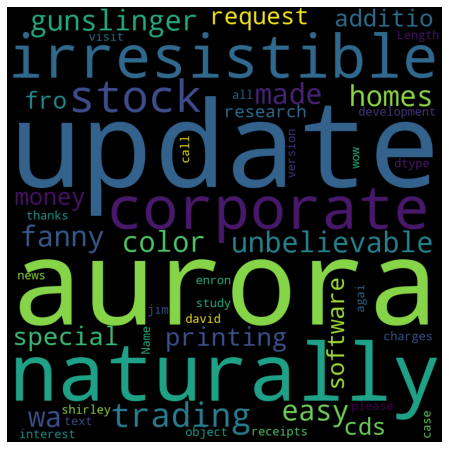

In [14]:
word_cloud=WordCloud(width=800,height=800,background_color='black',stopwords=stop_words,min_font_size=20).generate(str(df['text']))

fig=plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()